<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\LeaoN\AppData\Local\Temp\ipykernel_2924\3413574854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_1 = sns.boxplot(x='cut', y='price', data=data, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], palette='viridis')


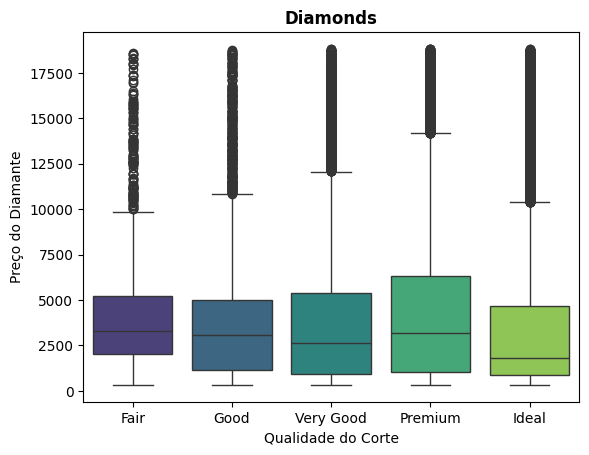

In [6]:
import matplotlib.pyplot as plt
grafico_1 = sns.boxplot(x='cut', y='price', data=data, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], palette='viridis')
grafico_1.set_title("Diamonds", fontsize=12, fontweight="bold")
grafico_1.set_xlabel("Qualidade do Corte", fontsize=10)
grafico_1.set_ylabel("Preço do Diamante", fontsize=10)

plt.show()

**Insight do gráfico 1**: boa parte dos cortes tem um preço semelhante, considerando a concentração de todos na faixa entre 2300 e 6000. Considerando a mediana, temos uma maior concentração de valores altos no tipo de corte premium, contudo, o corte considerando como good tambem apresenta um otimo retorno de preço, o que pode não justificar o investimento em uma maquina ou na compra de tantos diamentes em cortes melhores do que que o good. Dito isto, o que pode pesar para a seleção de diamantes premium seria a menor presença de outliers e maior preço de base. 

---

## 2\. Número de passageiros em dezembro por ano

In [7]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


C:\Users\LeaoN\AppData\Local\Temp\ipykernel_2924\139438998.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_2 = sns.barplot(x='year', y='passengers', data=december_data, palette=cor_palette)
C:\Users\LeaoN\AppData\Local\Temp\ipykernel_2924\139438998.py:7: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  grafico_2 = sns.barplot(x='year', y='passengers', data=december_data, palette=cor_palette)


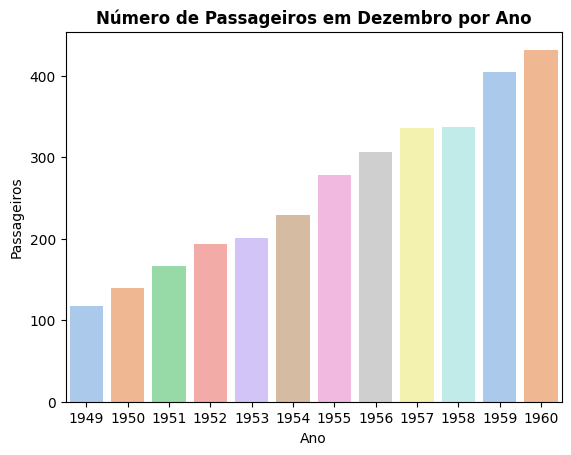

In [8]:
# gráfico do exercício 2
december_data = sns.load_dataset('flights').query('month == "Dec"')

# Escolhendo uma paleta de cores
cor_palette = sns.color_palette("pastel", as_cmap=True)

grafico_2 = sns.barplot(x='year', y='passengers', data=december_data, palette=cor_palette)
grafico_2.set_title("Número de Passageiros em Dezembro por Ano", fontsize=12, fontweight="bold")
grafico_2.set_xlabel("Ano", fontsize=10)
grafico_2.set_ylabel("Passageiros", fontsize=10)

plt.show()

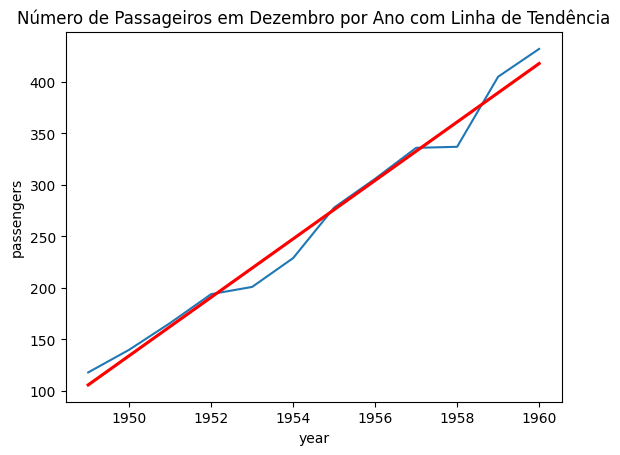

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

flights = sns.load_dataset('flights')

# Filtrando dados para dezembro
december_data = flights[flights['month'] == 'Dec']

# Gráfico de linha
sns.lineplot(x='year', y='passengers', data=december_data)

# Adicionando a linha de tendência (regressão linear)
sns.regplot(x='year', y='passengers', data=december_data, ci=None, color='red', scatter=False)

plt.title('Número de Passageiros em Dezembro por Ano com Linha de Tendência')
plt.show()


C:\Users\LeaoN\AppData\Local\Temp\ipykernel_2924\645659114.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_data['passengers_diff'] = december_data['passengers'].diff()


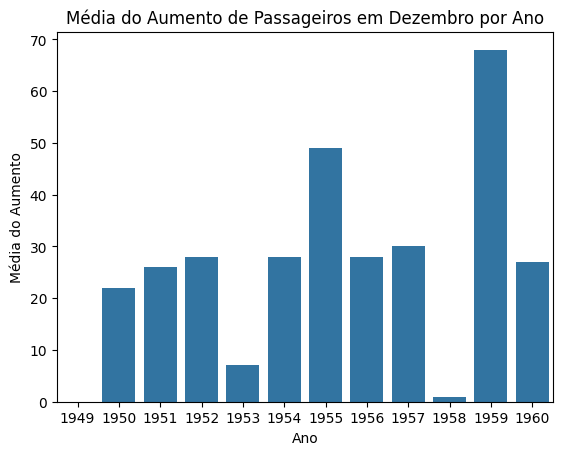

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

flights = sns.load_dataset('flights')

# Filtrando dados para dezembro
december_data = flights[flights['month'] == 'Dec']

# Calculando a diferença entre os passageiros de um ano para o próximo
december_data['passengers_diff'] = december_data['passengers'].diff()

# Calculando a média do aumento por ano
average_increase = december_data.groupby('year')['passengers_diff'].mean()

# Gráfico de barras para visualizar a média do aumento por ano
sns.barplot(x=average_increase.index, y=average_increase)
plt.title('Média do Aumento de Passageiros em Dezembro por Ano')
plt.xlabel('Ano')
plt.ylabel('Média do Aumento')
plt.show()


**Insight do gráfico 2**: pelo grafico_2 vemos uma média crescente de passageiros conforme o decorrer dos anos. o que foi confirmado pela linha de tendencia no proximo grafico. Embora a média de aumento do numero de passageiros não tenha sido constante, a conclusão que pode-se chegar é que houve aumento em todos os anos e continua sendo um mercado crescente em que poderia ser feito uma expectativa de sucesso. 

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [11]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


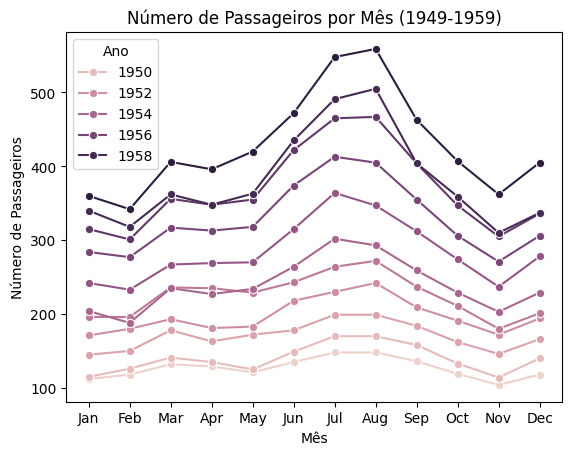

In [13]:
# gráfico do exercício 3
flights = sns.load_dataset('flights')

# Filtrando dados para o período entre 1949 e 1959
filtered_data = flights[(flights['year'] >= 1949) & (flights['year'] <= 1959)]

# Gráfico de linha
sns.lineplot(x='month', y='passengers', hue='year', data=filtered_data, marker='o')
plt.title('Número de Passageiros por Mês (1949-1959)')
plt.xlabel('Mês')
plt.ylabel('Número de Passageiros')
plt.legend(title='Ano')
plt.show()


**Insight do gráfico 3**: pode-se notar que independente do ano, há sempre uma alta de passageiros entre os menos de junho e setembro, seguido de uma queda que volta a crescer somente em dezembro, não se extendendo a janeiro. O que indica o que seria a alta e a baixa temporada de turismo

---